In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### 데이터 전처리

In [3]:
X_before_selection = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/예비실험 4/feature_and_target_without_zero.csv')
y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/예비실험 4/y_target_v2.csv')

In [4]:
X_before_selection = X_before_selection.astype(float)

In [5]:
feature_list = ["onset_delta", 'alsfrs_total_slope', 'min_alsfrs_total', 'diag_minus_onset', 'onset_site', 'fvc_slope', 'fvc_min', 'mean_Uric_Acid', 'alsfrs_leg_slope', 'min_alsfrs_leg', 'max_weight']

In [6]:
X = X_before_selection[feature_list]

In [7]:
y = y.drop(columns=['Unnamed: 0',"Unnamed: 0.1"])

### Train/Test set 분리

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

### 모델 생성 및 학습

### (1) Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
# LinearRegression 모델 생성/학습
model_lr = LinearRegression()
fitted_model_lr = model_lr.fit(X_train, y_train)

In [11]:
import statsmodels.api as sm
x_train1 = sm.add_constant(X_train,has_constant="add")

model = sm.OLS(y_train,X_train)
fitted_model_lr2 = model.fit()

fitted_model_lr2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           ALSFRS_slope   R-squared (uncentered):                   0.633
Model:                            OLS   Adj. R-squared (uncentered):              0.632
Method:                 Least Squares   F-statistic:                              365.7
Date:                Fri, 02 Apr 2021   Prob (F-statistic):                        0.00
Time:                        14:00:47   Log-Likelihood:                         -2038.5
No. Observations:                2340   AIC:                                      4099.
Df Residuals:                    2329   BIC:                                      4162.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
onset_delta           -0.0001   5.08e-05     -2.078      0.038      -0.000   -5.97e-06
alsfrs_total_slope     0.5210      0.281      1.854      0.064      -0.030       1.072
min_alsfrs_total      -0.0012      0.003     -0.445      0.657      -0.007       0.004
diag_minus_onset    3.662e-05   6.46e-05      0.567      0.571   -9.01e-05       0.000
onset_site             0.0279      0.018      1.529      0.126      -0.008       0.064
fvc_slope              0.2580      0.049      5.255      0.000       0.162       0.354
fvc_min               -0.0007      0.001     -0.935      0.350      -0.002       0.001
mean_Uric_Acid        -0.0013      0.000     -6.728      0.000      -0.002      -0.001
alsfrs_leg_slope      -0.4820      0.703     -0.686      0.493      -1.860       0.897
min_alsfrs_leg        -0.0263      0.007     -3.764      0.000      -0.040      -0.013
max_weight            -0.0031      0.001     -4.381      0.000      -0.005      -0.002
==============================================================================
Omnibus:                      189.263   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.345
Skew:                          -0.685   Prob(JB):                     1.60e-55
Kurtosis:                       3.845   Cond. No.                     4.90e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
fitted_model_lr2.params

onset_delta          -0.000106
alsfrs_total_slope    0.521007
min_alsfrs_total     -0.001246
diag_minus_onset      0.000037
onset_site            0.027947
fvc_slope             0.258029
fvc_min              -0.000708
mean_Uric_Acid       -0.001266
alsfrs_leg_slope     -0.481958
min_alsfrs_leg       -0.026256
max_weight           -0.003111
dtype: float64

### (2) XGBoost

In [13]:
from xgboost import XGBRegressor

In [14]:
# XGBRegressor 모델 생성/학습
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

[14:00:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### (3) Random Forests

In [15]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### 모델 평가하기

### (1) MAE, RMSE, R2

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [17]:
# Predict를 수행하고 mean_absolute_error, rmse, r-squared 결과 출력하기
pred_xgb = model_xgb.predict(X_test)
pred_lr = model_lr.predict(X_test)
pred_rf = model_rf.predict(X_test)

print('XGB MAE:', mean_absolute_error(y_test, pred_xgb))
print('XGB RMSE:', sqrt(mean_squared_error(y_test, pred_xgb)))
print('XGB R2:',  r2_score(y_test, pred_xgb))

print('LR MAE:', mean_absolute_error(y_test, pred_lr))
print('LR RMSE:', sqrt(mean_squared_error(y_test, pred_lr)))
print('LR R2:',  r2_score(y_test, pred_lr))

print('RF MAE:', mean_absolute_error(y_test, pred_rf))
print('RF RMSE:', sqrt(mean_squared_error(y_test, pred_rf)))
print('RF R2:',  r2_score(y_test, pred_rf))

XGB MAE: 0.412962975219483
XGB RMSE: 0.5414906644330337
XGB R2: 0.08800163521796145
LR MAE: 0.4328313836227148
LR RMSE: 0.5557466630181365
LR R2: 0.03934855621492683
RF MAE: 0.4226699458483869
RF RMSE: 0.5512635181443862
RF R2: 0.05478497317545461


### (2) Pearson Correlation score

In [18]:
import scipy.stats as stats
print("XGB PC:", stats.pearsonr(x = y_test, y = pred_xgb))
print("LR PC:", stats.pearsonr(x = y_test, y = pred_lr))
print("RF PC:", stats.pearsonr(x = y_test, y = pred_rf))

TypeError: ignored

### (3) 실제 값과 추측 값 시각화

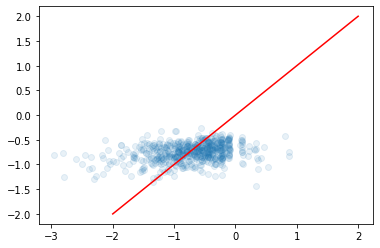

In [19]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(y_test, pred_xgb, alpha=0.1)
plt.plot([-2, 2], [-2,2], 'r-')

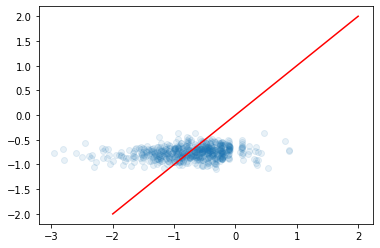

In [20]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(y_test, pred_lr, alpha=0.1)
plt.plot([-2, 2], [-2, 2], 'r-')

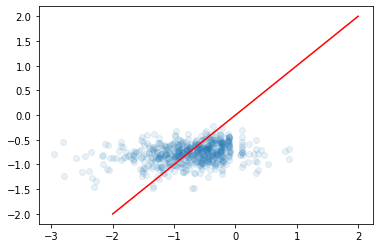

In [21]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(y_test, pred_rf, alpha=0.1)
plt.plot([-2, 2], [-2,2], 'r-')

### (4) XGBoost와 Random forest 모델의 feature importance 시각화

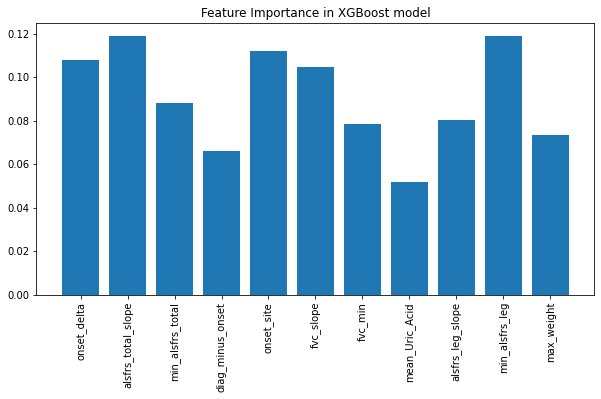

In [22]:
fig = plt.figure(figsize=(10,5))
plt.bar(X_train.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.title('Feature Importance in XGBoost model')
plt.show()

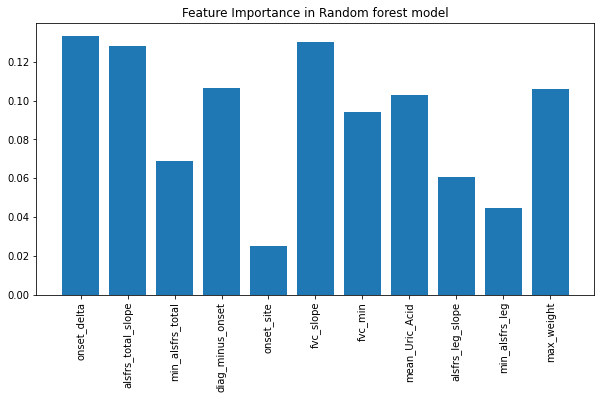

In [23]:
fig2 = plt.figure(figsize=(10,5))
plt.bar(X_train.columns, model_rf.feature_importances_)
plt.xticks(rotation=90)
plt.title('Feature Importance in Random forest model')
plt.show()

### 5-fold cross validation

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [25]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

In [26]:
scores_lr_r2 = cross_val_score(model_lr, X_train, y_train, scoring='r2', cv=folds)
scores_lr_rmse = cross_val_score(model_lr, X_train, y_train, scoring='neg_root_mean_squared_error', cv=folds)
scores_lr_mae = cross_val_score(model_lr, X_train, y_train, scoring='neg_mean_absolute_error', cv=folds)

In [27]:
scores_xgb_r2 = cross_val_score(model_xgb, X_train, y_train, scoring='r2', cv=folds)
scores_xgb_rmse = cross_val_score(model_xgb, X_train, y_train, scoring='neg_root_mean_squared_error', cv=folds)
scores_xgb_mae = cross_val_score(model_xgb, X_train, y_train, scoring='neg_mean_absolute_error', cv=folds)

[14:01:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:01:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:01:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:01:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:01:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:01:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:01:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:01:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [28]:
scores_rf_r2 = cross_val_score(model_rf, X_train, y_train, scoring='r2', cv=folds)
scores_rf_rmse = cross_val_score(model_rf, X_train, y_train, scoring='neg_root_mean_squared_error', cv=folds)
scores_rf_mae = cross_val_score(model_rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=folds)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

In [29]:
## Summary of LR model
print("MAE of LR model in 5 fold cv:", scores_lr_mae*(-1))
print("with its mean value:", scores_lr_mae.mean()*(-1))

print("R2 of LR model in 5 fold cv:", scores_lr_r2)
print("with its mean value:", scores_lr_r2.mean())

print("RMSE of LR model in 5 fold cv:", scores_lr_rmse*(-1))
print("with its mean value:", scores_lr_rmse.mean()*(-1))

MAE of LR model in 5 fold cv: [0.45274013 0.45035237 0.45319436 0.4368203  0.42040455]
with its mean value: 0.44270234256750207
R2 of LR model in 5 fold cv: [0.02946443 0.02995696 0.02576515 0.00663869 0.07098764]
with its mean value: 0.03256257446589692
RMSE of LR model in 5 fold cv: [0.5699534  0.57854611 0.57553824 0.56641816 0.54007421]
with its mean value: 0.566106021764561


In [30]:
## Summary of XGB model
print("MAE of XGB model in 5 fold cv:", scores_xgb_mae*(-1))
print("with its mean value:", scores_xgb_mae.mean()*(-1))

print("R2 of XGB model in 5 fold cv:", scores_xgb_r2)
print("with its mean value:", scores_xgb_r2.mean())

print("RMSE of XGB model in 5 fold cv:", scores_xgb_rmse*(-1))
print("with its mean value:", scores_xgb_rmse.mean()*(-1))

MAE of XGB model in 5 fold cv: [0.43079619 0.44482703 0.43548729 0.43888573 0.41871639]
with its mean value: 0.4337425256605544
R2 of XGB model in 5 fold cv: [0.09160922 0.09343422 0.07308876 0.00042209 0.07033548]
with its mean value: 0.06577795215957365
RMSE of XGB model in 5 fold cv: [0.55140409 0.55929654 0.5613858  0.56818776 0.54026373]
with its mean value: 0.5561075858509895


In [31]:
## Summary of RF model
print("MAE of RF model in 5 fold cv:", scores_rf_mae*(-1))
print("with its mean value:", scores_rf_mae.mean()*(-1))

print("R2 of RF model in 5 fold cv:", scores_rf_r2)
print("with its mean value:", scores_rf_r2.mean())

print("RMSE of RF model in 5 fold cv:", scores_rf_rmse*(-1))
print("with its mean value:", scores_rf_rmse.mean()*(-1))

MAE of RF model in 5 fold cv: [0.43645935 0.44919532 0.45303871 0.43936758 0.4251981 ]
with its mean value: 0.4406518122943054
R2 of RF model in 5 fold cv: [ 0.07441537  0.07190185  0.02078068 -0.00981966  0.03134932]
with its mean value: 0.03772551211761414
RMSE of RF model in 5 fold cv: [0.55324186 0.56503796 0.57670196 0.56987556 0.55083661]
with its mean value: 0.5631387909130394


In [32]:
data = [[scores_lr_mae.mean()*(-1), scores_lr_r2.mean(),scores_lr_rmse.mean()*(-1)], 
     [scores_xgb_mae.mean()*(-1), scores_xgb_r2.mean(), scores_xgb_rmse.mean()*(-1)], 
     [scores_rf_mae.mean()*(-1), scores_rf_r2.mean(), scores_rf_rmse.mean()*(-1)]]

E = pd.DataFrame(data, columns=['MAE', 'R squared', 'RMSE'], index=['Linear Regression', 'XGBoost', 'Random Forest'])
print(E)

                        MAE  R squared      RMSE
Linear Regression  0.442702   0.032563  0.566106
XGBoost            0.433743   0.065778  0.556108
Random Forest      0.440652   0.037726  0.563139
